In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#extract for async
#Parameters:
#   folder_name: Outermost folder where experiments livem specified in train.py
#   exp_name: Name of the experiment, specified in train.py
#   size: # of workers
#   epochs: # of epochs
#Output:
#   A dictionary containing a complete list of results. 
def extract_async(folder_name,size,epochs,noniid='0.5',run='1',
            algo='async',topology='fc',sgdmax="",sgdstep="",exp_name=""):
    
    def train_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-tacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["train-acc"].append(float(line))
                line = reader.readline()
    def comm_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-commtime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comm-time"].append(float(line))
                line = reader.readline()
    def comp_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-comptime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def epoch_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-epoch-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def loss(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-losses.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["loss"].append(float(line))
                line = reader.readline()            
    def test_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-acc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["test-acc"].append(float(line))
                line = reader.readline()
    def val_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-vacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["val-acc"].append(float(line))
                line = reader.readline()
    def total_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-total-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["total-time"].append(float(line))
                line = reader.readline()
    def consensus(subfolder,worker_dic):
        with open(subfolder+'/consensus-average-'+algo+'.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic['consensus'].append(float(line))
                line = reader.readline()
    if algo in ['async']:
        output_folder=folder_name+'/run-'+algo+'-'+noniid+'-noniid-'+sgdmax+'sgdmax-'+sgdstep+'sgdstep-'+topology+'-'+str(size)+'-test'+run+'-'+str(epochs)+'epochs'
    else:
        output_folder=folder_name+'/run-'+algo+'-'+noniid+'-noniid-'+topology+'-'+str(size)+'-test'+run+'-'+str(epochs)+'epochs'
    print(output_folder)
    worker_results={}
    for rank in range(size):
        worker_results[rank]={}
        worker_results[rank]["train-acc"]=[]
        worker_results[rank]["comm-time"]=[]
        worker_results[rank]["comp-time"]=[]
        worker_results[rank]["epoch-time"]=[]
        worker_results[rank]["loss"]=[]
        worker_results[rank]["test-acc"]=[]
        worker_results[rank]["val-acc"]=[]
        worker_results[rank]["total-time"]=[]
        worker_results['consensus']=[]
        train_acc(output_folder,worker_results,str(rank))
        comm_time(output_folder,worker_results,str(rank))
        comp_time(output_folder,worker_results,str(rank))
        epoch_time(output_folder,worker_results,str(rank))
        loss(output_folder,worker_results,str(rank))
        test_acc(output_folder,worker_results,str(rank))
        val_acc(output_folder,worker_results,str(rank))
        total_time(output_folder,worker_results,str(rank))
        consensus(output_folder,worker_results)
        
    return worker_results

In [44]:
#extract for async
#Parameters:
#   folder_name: Outermost folder where experiments livem specified in train.py
#   exp_name: Name of the experiment, specified in train.py
#   size: # of workers
#   epochs: # of epochs
#Output:
#   A dictionary containing a complete list of results. 
def extract_sync(folder_name,size,epochs,noniid='0.5',run='1',
            algo='ldsgd',decen_style="d",topology='fc',sgdmax="",sgdstep="",exp_name=""):
    
    def train_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-tacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["train-acc"].append(float(line))
                line = reader.readline()
    def comm_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-commtime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comm-time"].append(float(line))
                line = reader.readline()
    def comp_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-comptime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def epoch_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-epoch-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def loss(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-losses.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["loss"].append(float(line))
                line = reader.readline()            
    def test_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-acc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["test-acc"].append(float(line))
                line = reader.readline()
    def val_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-vacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["val-acc"].append(float(line))
                line = reader.readline()
    def total_time(subfolder,worker_dic,rank):
        with open(subfolder+'/r'+rank+'-total-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["total-time"].append(float(line))
                line = reader.readline()
    def consensus(subfolder,worker_dic):
        with open(subfolder+'/consensus-average-'+decen_style+'-sgd'+'.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic['consensus'].append(float(line))
                line = reader.readline()
    if algo in ['async']:
        output_folder=folder_name+'/run-'+algo+'-'+noniid+'-noniid-'+sgdmax+'sgdmax-'+sgdstep+'sgdstep-'+topology+'-'+str(size)+'-test'+run+'-'+str(epochs)+'epochs'
    else:
        output_folder=folder_name+'/run-'+algo+'-'+noniid+'-noniid-'+topology+'-'+str(size)+'-test'+run+'-'+str(epochs)+'epochs'
    print(output_folder)
    worker_results={}
    for rank in range(size):
        worker_results[rank]={}
        worker_results[rank]["train-acc"]=[]
        worker_results[rank]["comm-time"]=[]
        worker_results[rank]["comp-time"]=[]
        worker_results[rank]["epoch-time"]=[]
        worker_results[rank]["loss"]=[]
        worker_results[rank]["test-acc"]=[]
        worker_results[rank]["val-acc"]=[]
        worker_results[rank]["total-time"]=[]
        worker_results['consensus']=[]
        train_acc(output_folder,worker_results,str(rank))
        comm_time(output_folder,worker_results,str(rank))
        comp_time(output_folder,worker_results,str(rank))
        epoch_time(output_folder,worker_results,str(rank))
        loss(output_folder,worker_results,str(rank))
        test_acc(output_folder,worker_results,str(rank))
        val_acc(output_folder,worker_results,str(rank))
        total_time(output_folder,worker_results,str(rank))
        consensus(output_folder,worker_results)
        
    return worker_results

In [113]:
#plot_experiment
#Parameters:
#   worker_dic: output from extract()
#   size: number of workers
#   epochs: # of epochs
#   key: type of data desired. Ex: "train-acc", "comm-time", etc.
#Output:
#.  A plot of the experiment for given key. 
def plot_individual_experiment_noniid(size, epochs, key,algo_type="async",noniid_deg='0.5',decen_type="", run_num='1',topology='fc'):
    if decen_type:
        worker_results=extract_sync('Output/Test-NonIID-'+noniid_deg,size=5,epochs=200,noniid=noniid_deg,
                            run=run_num,algo=algo_type,decen_style=decen_type,topology='fc',sgdmax='5',
                            sgdstep='2')
    else:
        worker_results=extract_async('Output/Test-NonIID-'+noniid_deg,size=5,epochs=200,noniid=noniid_deg,
                            run=run_num,algo='async',topology='fc',sgdmax='5',sgdstep='2')
    x=range(epochs)     
    for i in range(size):
        worker_data=worker_results[i][key]
        plt.plot(x,worker_data,label='worker '+str(i))
    plt.xlabel('epochs')
    plt.ylabel(key) 
    plt.title('Comparison among '+str(size)+' workers')
    plt.legend()
    plt.show()

#Not finished yet.
def plot_consensus_single_noniid(worker_dic,size,epochs,algo="async",decen_style="d"):
    x=range(epochs)
    plt.plot(x,worker_dic['consensus'],label=algo)
    plt.xlabel('epochs')
    plt.ylabel('Test accuracy') 
    plt.title('Accuracy of consensus models - '+str(size)+' workers')
    plt.legend()
    plt.show()

def plot_consensus_all_noniid(size,epochs,run_num='1',noniid_deg='0.5'):
    x=range(epochs)
    worker_results=extract_async('Output/Test-NonIID-'+noniid_deg,size=5,epochs=200,noniid=noniid_deg,
                                 run=run_num,algo='async',topology='fc',
                       sgdmax='5',sgdstep='2')
    plt.plot(x,worker_results['consensus'],label='async')
    for decen_type in [['pdsgd','pd'],['dsgd','d'],['ldsgd','ld']]:
        worker_results=extract_sync('Output/Test-NonIID-'+noniid_deg,size=5,epochs=200,noniid=noniid_deg,
                                    run=run_num,algo=decen_type[0],decen_style=decen_type[1],topology='fc',sgdmax='5',
                                    sgdstep='2')
        plt.plot(x,worker_results['consensus'],label=decen_type[1]+'sgd')  
    plt.xlabel('epochs')
    plt.ylabel('Test accuracy') 
    plt.title('Accuracy of consensus models - '+str(size)+' workers')
    plt.legend()
    plt.show()       

Output/Test-NonIID-0.5/run-pdsgd-0.5-noniid-fc-5-test1-200epochs


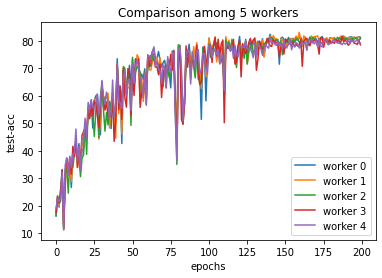

In [112]:
#Example

#plot_individual_experiment([worker_results],5,200,'key')
#plot_consensus_single(worker_results,5,200,'pdsgd')
plot_individual_experiment_noniid(size=5, epochs=200, key="test-acc",algo_type="pdsgd",noniid_deg="0.5",decen_type="pd")





Output/Test-NonIID-0.5/run-async-0.5-noniid-5sgdmax-2sgdstep-fc-5-test1-200epochs
Output/Test-NonIID-0.5/run-pdsgd-0.5-noniid-fc-5-test1-200epochs
Output/Test-NonIID-0.5/run-dsgd-0.5-noniid-fc-5-test1-200epochs
Output/Test-NonIID-0.5/run-ldsgd-0.5-noniid-fc-5-test1-200epochs


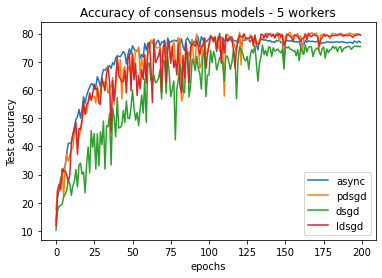

In [93]:
#Experimental results:
#Parameters
#non-IID -0.5,
#2 SGD Steps, 5 SGD Max
plot_consensus_all_noniid(5,200,run_num='1',noniid_deg='0.5')
    

Output/Test-NonIID-0.75/run-async-0.75-noniid-5sgdmax-2sgdstep-fc-5-test1-200epochs
Output/Test-NonIID-0.75/run-pdsgd-0.75-noniid-fc-5-test1-200epochs
Output/Test-NonIID-0.75/run-dsgd-0.75-noniid-fc-5-test1-200epochs
Output/Test-NonIID-0.75/run-ldsgd-0.75-noniid-fc-5-test1-200epochs


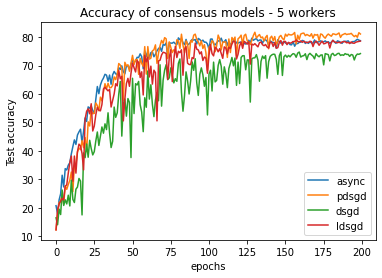

In [94]:
#Experimental results:
#Parameters
#non-IID -0.75,
#2 SGD Steps, 5 SGD Max
plot_consensus_all_noniid(5,200,run_num='1',noniid_deg='0.75')

Output/Test-NonIID-1/run-async-1-noniid-5sgdmax-2sgdstep-fc-5-test1-200epochs
Output/Test-NonIID-1/run-pdsgd-1-noniid-fc-5-test1-200epochs
Output/Test-NonIID-1/run-dsgd-1-noniid-fc-5-test1-200epochs
Output/Test-NonIID-1/run-ldsgd-1-noniid-fc-5-test1-200epochs


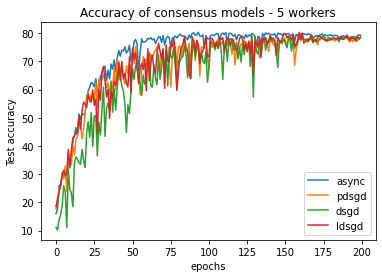

In [95]:
#Experimental results:
#Parameters
#non-IID -1,
#2 SGD Steps, 5 SGD Max
plot_consensus_all_noniid(5,200,run_num='1',noniid_deg='1')